In [12]:
COLOR1 = '#6495ED'
COLOR2 = '#FF7518'

In [13]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
nasa_tlx = pd.read_csv('data/nasa_tlx.csv', index_col=0)
display(nasa_tlx)

,DAW,VR,2D SE,3D SE
Mental demand,12.583333,11.333333,0.933049,0.690392
Physical demand,6.000000,7.666667,0.608753,0.528840
Temporal demand,13.833333,7.833333,0.833333,0.432283
Performance,10.416667,14.416667,0.789371,0.514315
Effort,10.500000,8.333333,0.882990,0.578988
Frustration,8.750000,5.250000,0.683500,0.536543


Adding "* *" to column Temporal demand at position 2
Adding "*" to column Performance at position 3


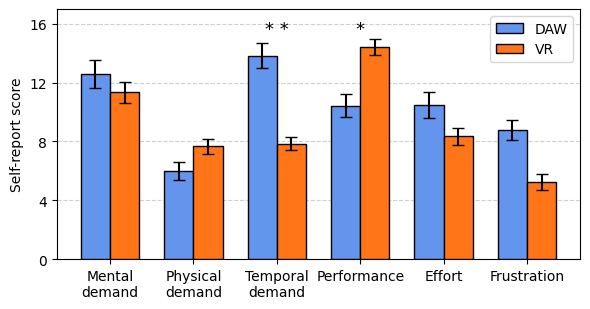

In [15]:
#Column daw and vr are two bars to plot, 2Dse and 3Dse are the two error bars

# Plotting the NASA-TLX scores
fig, ax = plt.subplots(figsize=(6, 3.2))
index = np.arange(nasa_tlx.shape[0])
bar_width = 0.35
opacity = 1

rects1 = plt.bar(index -bar_width/2, nasa_tlx['DAW'], bar_width, alpha=opacity, color=COLOR1, label='DAW', edgecolor='black', zorder=10)
rects2 = plt.bar(index + bar_width/2, nasa_tlx['VR'], bar_width, alpha=opacity, color=COLOR2, label='VR', edgecolor='black', zorder=10)

plt.errorbar(index - bar_width/2, nasa_tlx['DAW'], yerr=nasa_tlx['2D SE'], fmt='none', ecolor='black', capsize=4, zorder=10)
plt.errorbar(index + bar_width/2, nasa_tlx['VR'], yerr=nasa_tlx['3D SE'], fmt='none', ecolor='black', capsize=4, zorder=10)

# Statistical significance asterisks
asterisks = {'Performance':'*', "Temporal demand" : '* *'}

for i,row in enumerate(nasa_tlx.index):
    # print('row:', row)
    for key, val in asterisks.items():
        if row.lower() == key.lower():
            print('Adding "%s" to column %s at position %d' % (val, key, i))

            ypos = 15 #max(nasa_tlx['DAW'][key], nasa_tlx['VR'][key]) + 1
            plt.text(i, ypos, val, ha='center', va='bottom', color='black', fontsize=13)



# plt.xlabel('Subject')
plt.ylabel('Self-report score')
# plt.title('NASA-TLX Scores')

plt.xticks(index, nasa_tlx.index.str.strip().str.replace(' ','\n'), rotation=0)
# plt.xticks(index, nasa_tlx.index.str.strip(), rotation=15, ha='right')
topylim = 17
plt.ylim(0, topylim)
plt.yticks(np.arange(0, topylim+1, 4))
# ygrid
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=0)

plt.legend()
plt.tight_layout()

if os.path.exists('plots/questionnaires') is False:
    os.makedirs('plots/questionnaires')
plt.savefig('plots/questionnaires/nasa_tlx.pdf', bbox_inches='tight')




In [16]:
ad_hoc = pd.read_csv('data/ad_hoc.csv', index_col=0)
display(ad_hoc)

,DAW,VR,DAW SE,VR SE
Standing,2.083333,8.416667,0.933049,0.690392
Satisfaction,4.916667,7.916667,0.608753,0.528840
Enjoyment,5.833333,9.333333,0.833333,0.432283
Helpful,5.750000,8.083333,0.789371,0.514315
Effort Reward,6.083333,8.750000,0.882990,0.578988
Expressiveness,5.166667,8.000000,0.683500,0.536543
Absorption,3.500000,7.333333,0.996205,0.594588
Happiness,6.583333,7.916667,0.964980,0.712000
Easyness,6.083333,7.916667,0.811455,0.608753
Creativity,5.416667,7.916667,0.773210,0.679330


Adding "* * *" to column Standing at position 0
Adding "* *" to column Satisfaction at position 1
Adding "* * *" to column enjoyment at position 2
Adding "*" to column Helpful at position 3
Adding "*" to column Effort Reward at position 4
Adding "* *" to column Expressiveness at position 5
Adding "* *" to column Absorption at position 6
Adding "*" to column creativity at position 9
Adding "*" to column attention at position 10


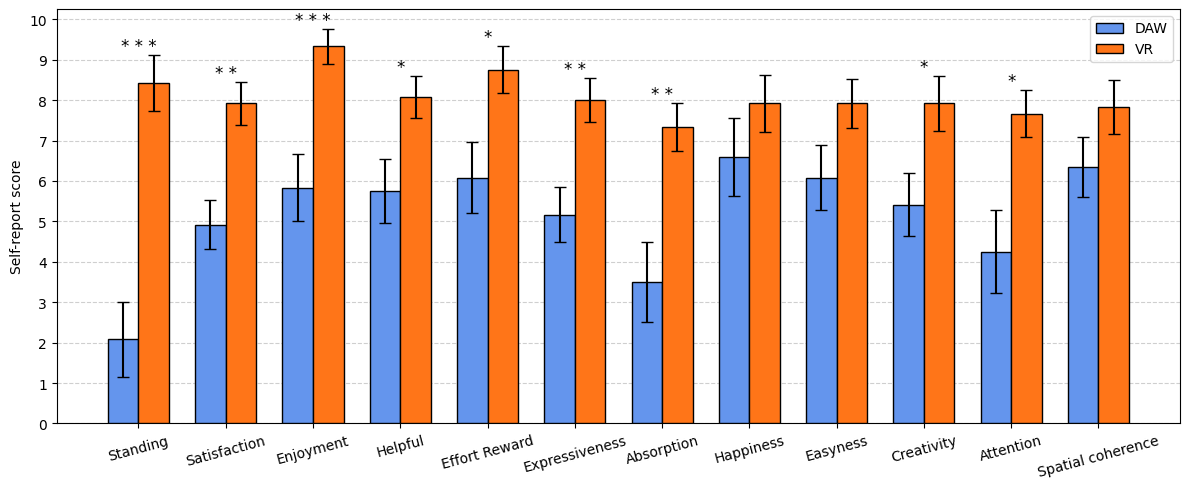

In [17]:


# Plotting the Ad Hoc scores

fig, ax = plt.subplots(figsize=(12, 5))
index = np.arange(ad_hoc.shape[0])
bar_width = 0.35
opacity = 1
spacing = 0

rects1 = plt.bar(index -bar_width/2, ad_hoc['DAW'], bar_width, alpha=opacity, color=COLOR1, label='DAW', edgecolor='black', zorder=10)
rects2 = plt.bar(index + bar_width/2, ad_hoc['VR'], bar_width, alpha=opacity, color=COLOR2, label='VR', edgecolor='black', zorder=10)

plt.errorbar(index - bar_width/2, ad_hoc['DAW'], yerr=ad_hoc['DAW SE'], fmt='none', ecolor='black', capsize=4, zorder=10)
plt.errorbar(index + bar_width/2, ad_hoc['VR'], yerr=ad_hoc['VR SE'], fmt='none', ecolor='black', capsize=4, zorder=10)

# Statistical significance asterisks
asterisks = {'Standing':'* * *',
             'Satisfaction':'* *',
             'enjoyment':'* * *',
             'Helpful':'*',
             'Effort Reward':'*',
             'Expressiveness':'* *',
             'Absorption':'* *',
             'creativity':'*',
             'attention':'*'}

for i,row in enumerate(ad_hoc.index):
    # print('row:', row)
    for key, val in asterisks.items():
        if row.lower() == key.lower():
            print('Adding "%s" to column %s at position %d' % (val, key, i))

            ypos = max(ad_hoc['DAW'][row]+ad_hoc['DAW SE'][row], ad_hoc['VR'][row]+ad_hoc['VR SE'][row]) + 0
            plt.text(i*(1+spacing), ypos, val, ha='center', verticalalignment='center', va='bottom', color='black', fontsize=12)



# plt.xlabel('Subject')
plt.ylabel('Self-report score')
# plt.title('Ad Hoc Scores')

# plt.xticks(index, ad_hoc.index.str.strip(), rotation=15, ha='right')
plt.xticks(index, ad_hoc.index.str.strip(), rotation=15)
# plt.xticks(index, ad_hoc.index.str.strip())
# plt.ylim(0, 16)
plt.yticks(np.arange(0, 11, 1))
# ygrid
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=0)

plt.legend()
plt.tight_layout()

if os.path.exists('plots/questionnaires') is False:
    os.makedirs('plots/questionnaires')

plt.savefig('plots/questionnaires/ad_hoc.pdf', bbox_inches='tight')

In [18]:
# Behavioral data now (which needs mean and se computation to be done here)

# Load the data
behavioral_raw = pd.read_csv('data/behavioral.csv', index_col=[0,1])
# Sort by index 0 and 1, where 0 is "P" plus an integer, and 1 is a string
display(behavioral_raw)

play/stop  select track  draw trajectory  \
Participant Condition                                             
P1          VR                10            11               14   
            DAW                3             5                5   
P2          DAW                9             4               10   
            VR                 4             8                6   
P3          VR                18            11                9   
            DAW                1             6                9   
P4          DAW               33            19               14   
            VR                 7            13               15   
P5          VR                13             7               27   
            DAW                8             0               30   
P6          DAW               16            14               29   
            VR                22             7               60   
P7          VR                 4             7               18   
            DAW                7             6                9   
P8          DAW                7            10                9   
            VR                 1             8                6   
P9          VR                18            13               11   
            DAW                8             9               10   
P10         DAW               17            22               14   
            VR                18            30               18   
P11         VR                 6             7               12   
            DAW               11             7                8   
P12         DAW                7            15               12   
            VR                 4             7               10   

                       clear automation  change timeslider  
Participant Condition                                       
P1          VR                        0                  7  
            DAW                       0                  0  
P2          DAW                       0                  1  
            VR                        1                  0  
P3          VR                        3                  0  
            DAW                       0                  0  
P4          DAW                       3                  0  
            VR                       13                  2  
P5          VR                        5                 29  
            DAW                       0                  3  
P6          DAW                       9                  8  
            VR                        3                 70  
P7          VR                        5                  7  
            DAW                       0                  2  
P8          DAW                       5                  0  
            VR                        1                  0  
P9          VR                        3                  3  
            DAW                       2                  0  
P10         DAW                       1                  1  
            VR                        3                  0  
P11         VR                        1                  6  
            DAW                       0                  0  
P12         DAW                       5                  1  
            VR                        2                  0

In [19]:
behavioral_statistics = pd.DataFrame(index = behavioral_raw.columns, columns=['DAW', 'VR', 'DAW SE', 'VR SE'])

# Compute mean and standard error
for col in behavioral_raw.columns:
    # first, compute the mean of column col for all players (index[0]) and condition (index[1]) DAW
    behavioral_statistics.loc[col, 'DAW'] = behavioral_raw.loc[(slice(None), 'DAW'), col].mean()
    behavioral_statistics.loc[col, 'DAW SE'] = behavioral_raw.loc[(slice(None), 'DAW'), col].std() / np.sqrt(behavioral_raw.loc[(slice(None), 'DAW'), col].shape[0])
    
    behavioral_statistics.loc[col, 'VR'] = behavioral_raw.loc[(slice(None), 'VR'), col].mean()
    behavioral_statistics.loc[col, 'VR SE'] = behavioral_raw.loc[(slice(None), 'VR'), col].std() / np.sqrt(behavioral_raw.loc[(slice(None), 'VR'), col].shape[0])

index_order = ['change timeslider', 'clear automation', 'draw trajectory', 'clear automation', 'play/stop', 'select track']
behavioral_statistics = behavioral_statistics.loc[index_order]
# first in caps lock in index
behavioral_statistics.index = behavioral_statistics.index.str.capitalize()

display(behavioral_statistics)

,DAW,VR,DAW SE,VR SE
Change timeslider,1.333333,10.333333,0.666667,5.907537
Clear automation,2.083333,3.333333,0.838996,0.987293
Draw trajectory,13.25,17.166667,2.306529,4.245913
Clear automation,2.083333,3.333333,0.838996,0.987293
Play/stop,10.583333,10.416667,2.426053,2.054036
Select track,9.75,10.75,1.883441,1.879414


Adding "*" to column change timeslider at position 0


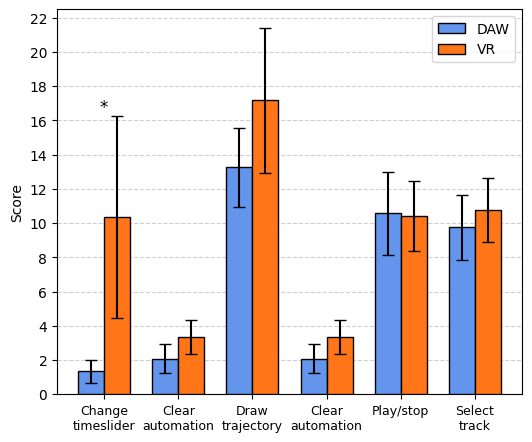

In [20]:
fig, ax = plt.subplots(figsize=(6, 5))
index = np.arange(behavioral_statistics.shape[0])
bar_width = 0.35
opacity = 1

# del spacing

rects1 = plt.bar(index -bar_width/2, behavioral_statistics['DAW'], bar_width, alpha=opacity, color=COLOR1, label='DAW', edgecolor='black', zorder=10)
rects2 = plt.bar(index + bar_width/2, behavioral_statistics['VR'], bar_width, alpha=opacity, color=COLOR2, label='VR', edgecolor='black', zorder=10)

plt.errorbar(index - bar_width/2, behavioral_statistics['DAW'], yerr=behavioral_statistics['DAW SE'], fmt='none', ecolor='black', capsize=4, zorder=10)
plt.errorbar(index + bar_width/2, behavioral_statistics['VR'], yerr=behavioral_statistics['VR SE'], fmt='none', ecolor='black', capsize=4, zorder=10)

# Statistical significance asterisks
asterisks = {'change timeslider':'*'}

for i,row in enumerate(behavioral_statistics.index):
    # print('row:', row)
    for key, val in asterisks.items():
        if row.lower() == key.lower():
            print('Adding "%s" to column %s at position %d' % (val, key, i))

            ypos = max(behavioral_statistics['DAW'][row]+behavioral_statistics['DAW SE'][row], behavioral_statistics['VR'][row]+behavioral_statistics['VR SE'][row]) + 0
            plt.text(i, ypos, val, ha='center', verticalalignment='center', va='bottom', color='black', fontsize=12)

plt.ylabel('Score')

plt.xticks(index, behavioral_statistics.index.str.strip().str.replace(' ','\n'), size=9) #, rotation=15)
plt.yticks(np.arange(0, 24, 2))
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=0)

plt.legend()

plt.savefig('plots/questionnaires/behavioral.pdf', bbox_inches='tight')